In [2]:
#imports

import pandas as pd # Data manipulation
import os # Operating system interaction
import matplotlib.pyplot as plt # Plotting library
import seaborn as sns # Statistical visualizations
import numpy as np # Numerical operations
import missingno as msno # Missing data visualization

In [3]:

print(os.getcwd())

# This path assumes your 01_eda.ipynb notebook is in the 'notebooks' folder,
# and your 'Loan.csv' is in 'data/raw/'
file_path = "C:/Users/admin/Monorepo-Finance-Projects/data/raw/loan.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

C:\Users\admin\Monorepo-Finance-Projects\data\raw


In [4]:
print("First 10 rows of the DataFrame:")
df

First 10 rows of the DataFrame:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df.shape # 614 observations, or rows, and 13 variables, or columns.

(614, 13)


--- Visualizing Distributions ---

**Histograms and KDE Plots for Continuous Numerical Features:**


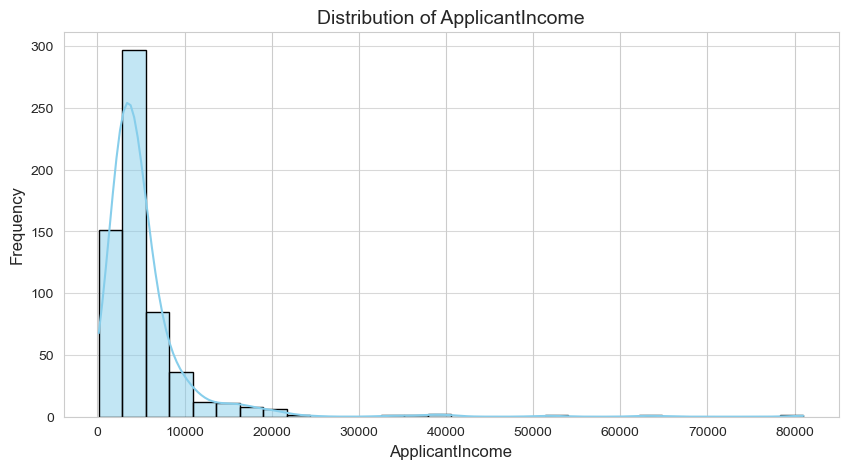

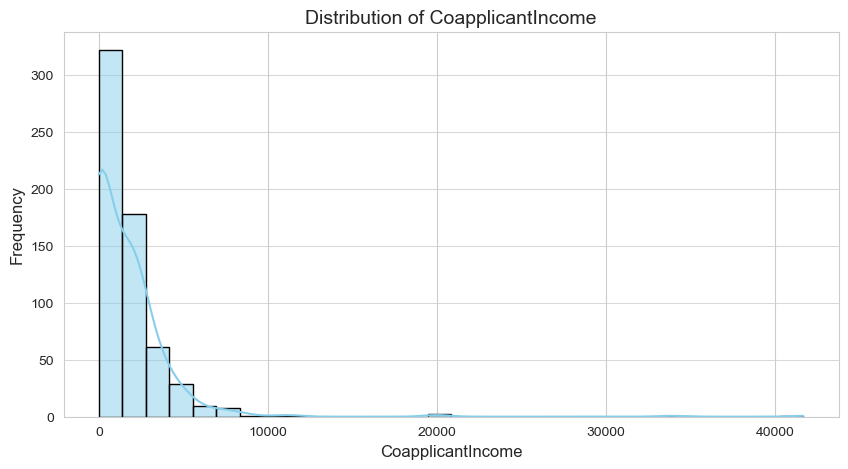

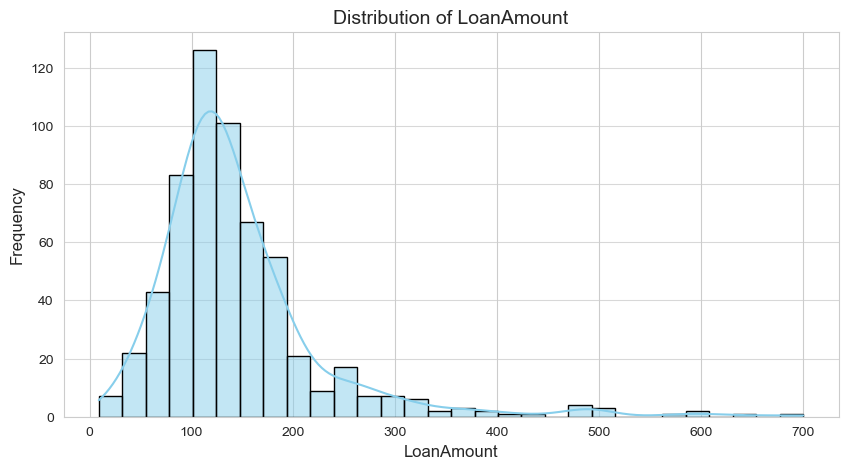


**Box Plots for Continuous Numerical Features (to visualize outliers and spread):**


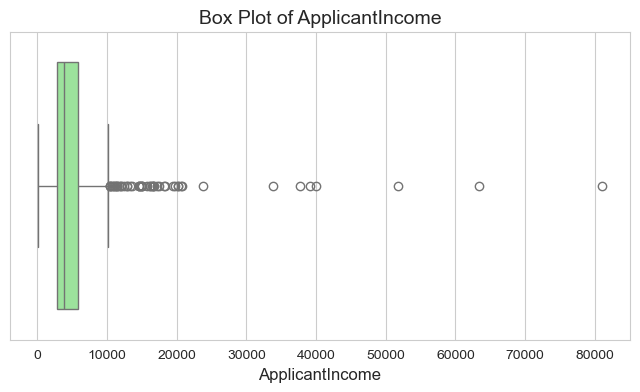

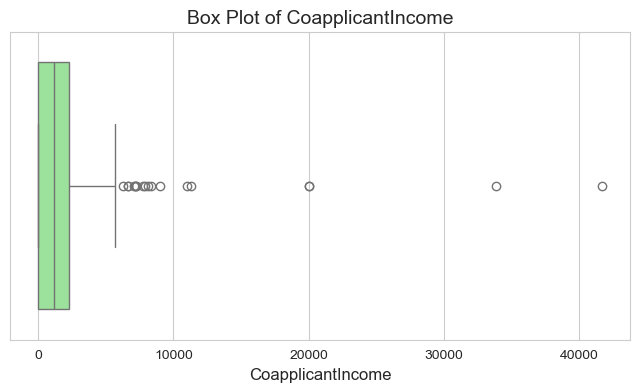

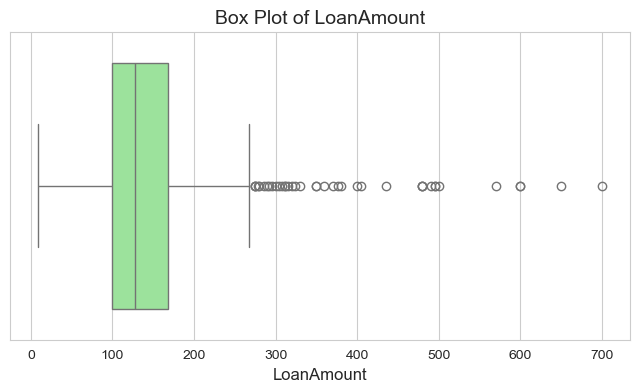


**Count Plots for Discrete/Ordinal Numerical Features:**


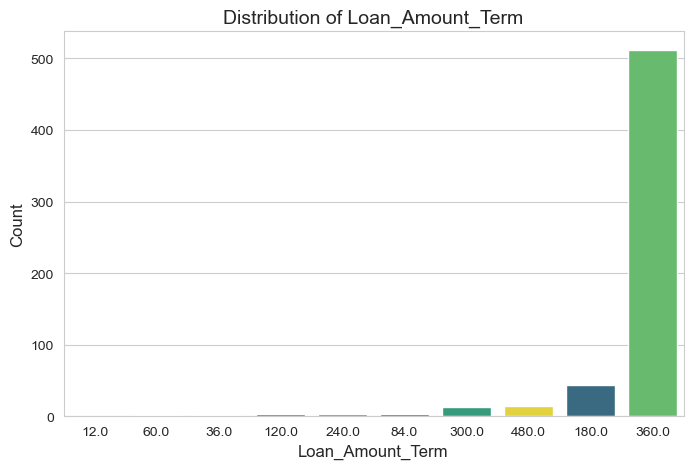

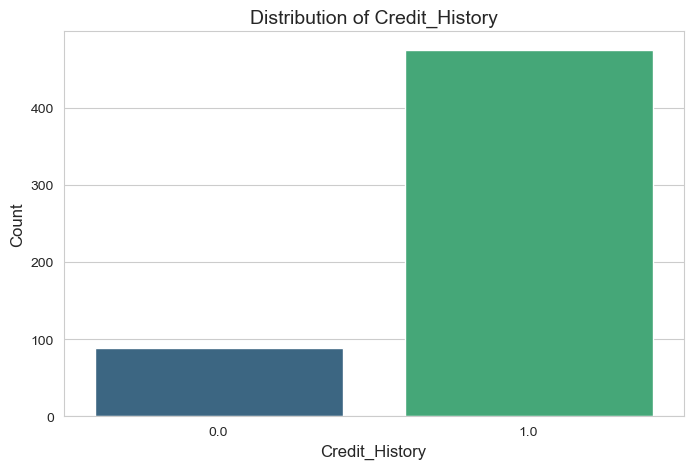


**Count Plots for Categorical Features:**


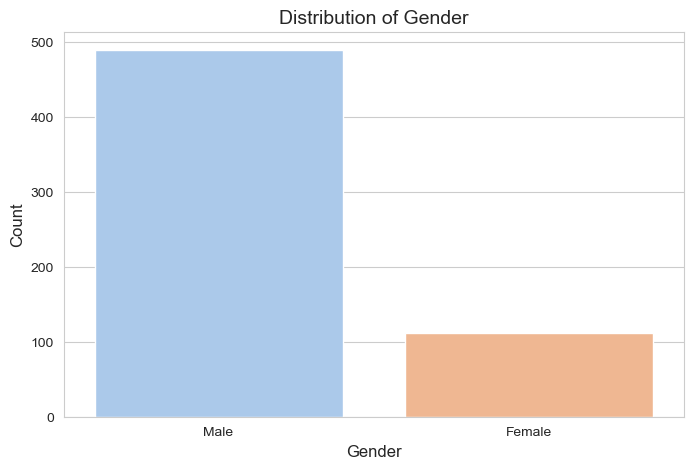

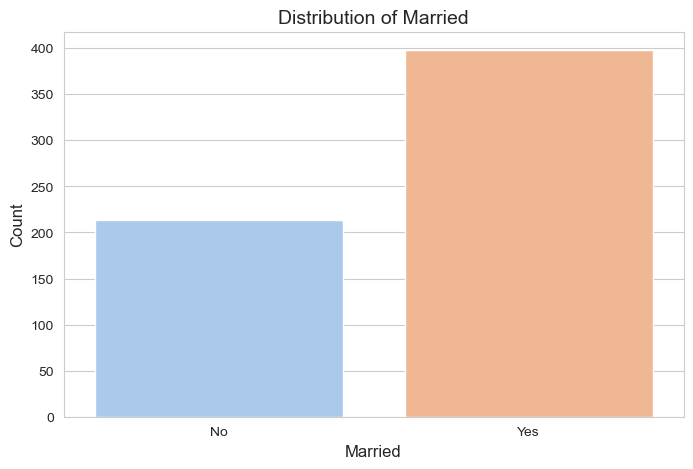

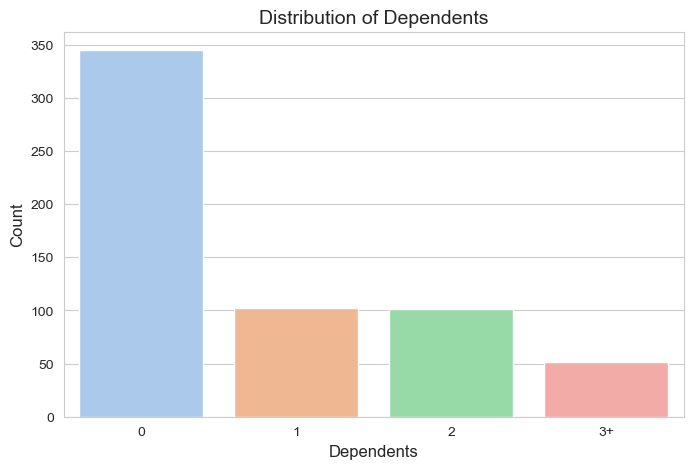

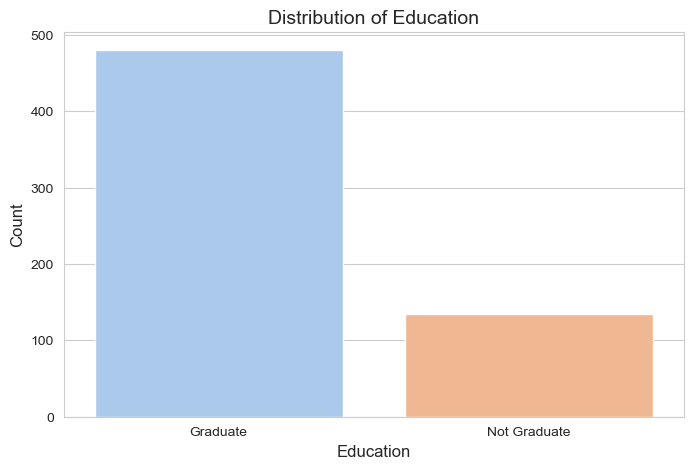

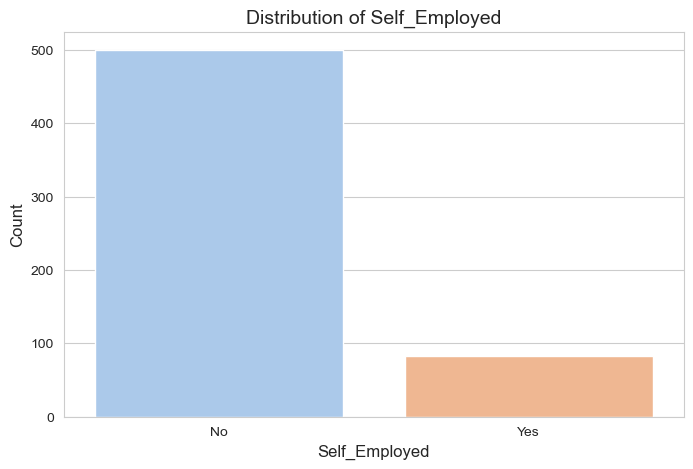

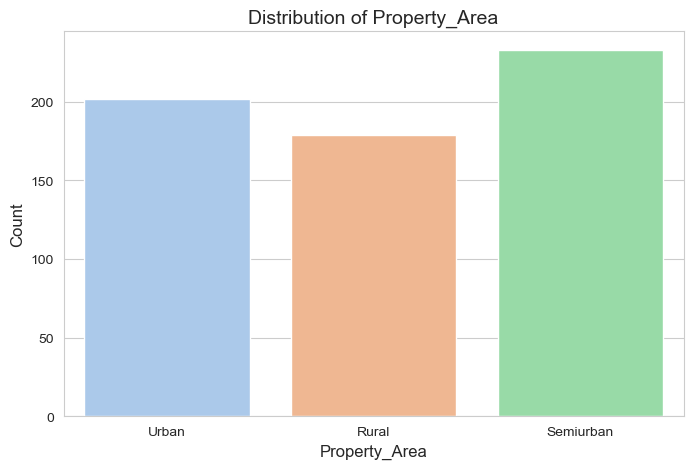


**Distribution of Target Variable (Loan_Status):**


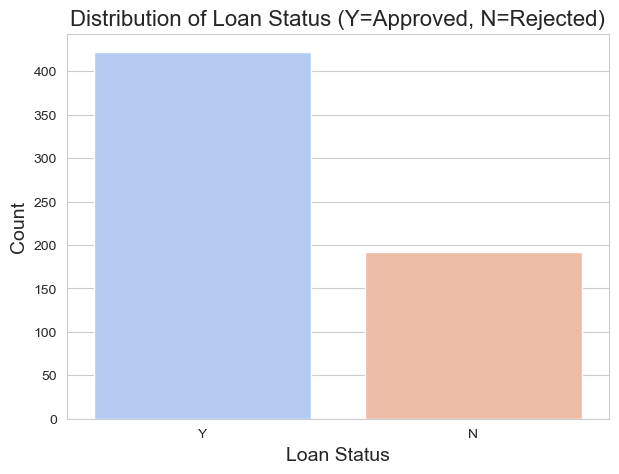


**Example of Potential Log Transformation for ApplicantIncome (to normalize skew):**


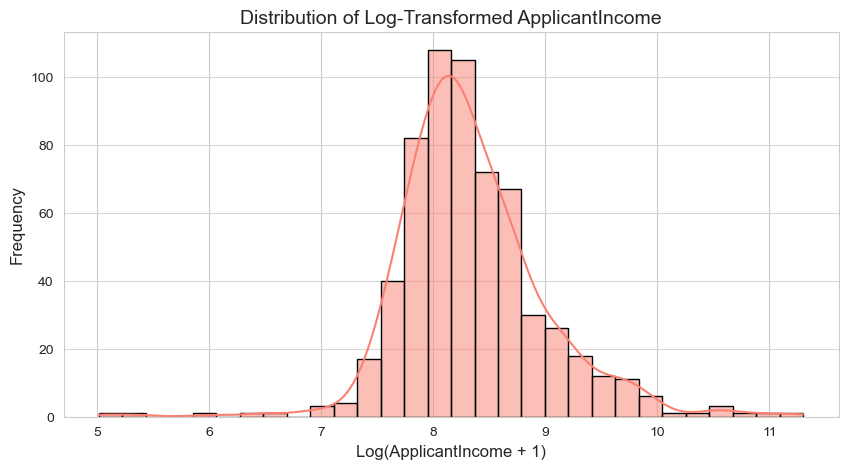

In [6]:
#Visualize Distribution



#setting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Adjust default figure size



print("\n--- Visualizing Distributions ---")


            # --- Numerical Features ---
numerical_continuous_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


print("\n**Histograms and KDE Plots for Continuous Numerical Features:**")
for feature in numerical_continuous_features:
    plt.figure(figsize=(10,5))
    # Use .dropna() to exclude NaNs from the plot; these will be handled later in EDA.
    sns.histplot(df[feature].dropna(), kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', alpha=0.75)
    plt.show()

print("\n**Box Plots for Continuous Numerical Features (to visualize outliers and spread):**")
for feature in numerical_continuous_features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[feature].dropna(),color='lightgreen')
    plt.title(f'Box Plot of {feature}', fontsize = 14)
    plt.xlabel(feature,fontsize=12)
    plt.show()


            # --- Quasi Numerical / Ordinal Features --- 
quasi_numerical_features = ['Loan_Amount_Term', 'Credit_History']
print("\n**Count Plots for Discrete/Ordinal Numerical Features:**")
for feature in quasi_numerical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(
    x=feature,
    hue=feature,
    data=df.dropna(subset=[feature]),
    palette='viridis',
    order=df[feature].value_counts().sort_values(ascending=True).index,
    legend=False
)

    plt.title(f'Distribution of {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.show()

        # ---  Visualize Categorical Features ---
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
print("\n**Count Plots for Categorical Features:**")
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    if feature == 'Dependents':  # Fixed indentation here - removed extra spaces
        order = ['0', '1', '2', '3+'] # Specific order for Dependents
        sns.countplot(
            x=feature,
            hue=feature,
            data=df.dropna(subset=[feature]),
            palette='pastel',
            order=order,
            legend=False
           
        )
    else:
        sns.countplot(
            x=feature,
            hue=feature,
            data=df.dropna(subset=[feature]),
            palette='pastel',
            legend=False
        )
    
    plt.title(f'Distribution of {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.show()
    
        # ---  Visualize Target Variable Distribution ---  
print("\n**Distribution of Target Variable (Loan_Status):**")
plt.figure(figsize=(7, 5))
sns.countplot(
    x='Loan_Status',
    hue ='Loan_Status',
    data=df,
    palette='coolwarm',
    legend=False
)
plt.title('Distribution of Loan Status (Y=Approved, N=Rejected)', fontsize=16)
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


        # ---  Test of Log Transformation (for highly skewed data like ApplicantIncome) ---
print("\n**Example of Potential Log Transformation for ApplicantIncome (to normalize skew):**")
applicant_income_transformed = np.log1p(df['ApplicantIncome'].dropna())
plt.figure(figsize=(10, 5))
sns.histplot(applicant_income_transformed, kde=True, bins=30, color='salmon', edgecolor='black')
plt.title('Distribution of Log-Transformed ApplicantIncome', fontsize=14)
plt.xlabel('Log(ApplicantIncome + 1)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

    


**Correlation Matrix of continuous features:**


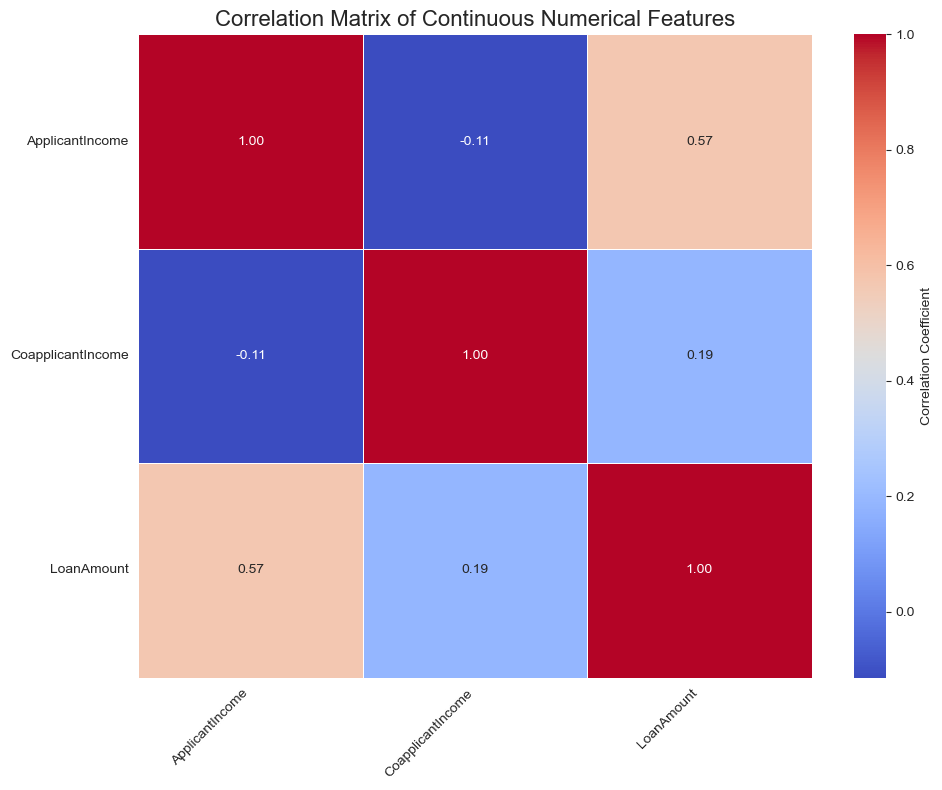


**Crosstabulation of categorical features:**

--- Analyzing: Gender vs. Loan_Status ---

Counts for Gender vs. Loan_Status:
Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339

Proportions (normalized by Gender category) for Gender vs. Loan_Status:
Loan_Status         N         Y
Gender                         
Female       0.330357  0.669643
Male         0.306748  0.693252

Proportions (normalized by Loan_Status category) for Gender vs. Loan_Status:
Loan_Status         N         Y
Gender                         
Female       0.197861  0.181159
Male         0.802139  0.818841

Proportions (normalized by total) for Gender vs. Loan_Status:
Loan_Status         N         Y
Gender                         
Female       0.061564  0.124792
Male         0.249584  0.564060

--- Analyzing: Married vs. Loan_Status ---

Counts for Married vs. Loan_Status:
Loan_Status    N    Y
Married              
No            79  134
Yes          113  285

Proportions (normal

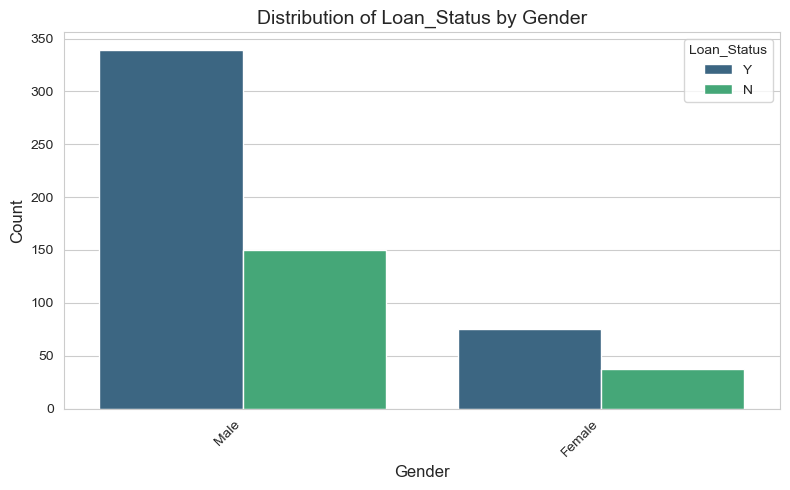

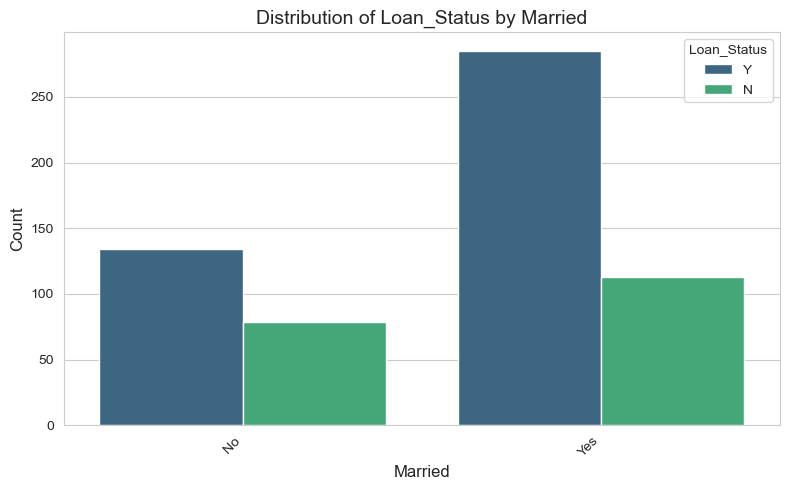

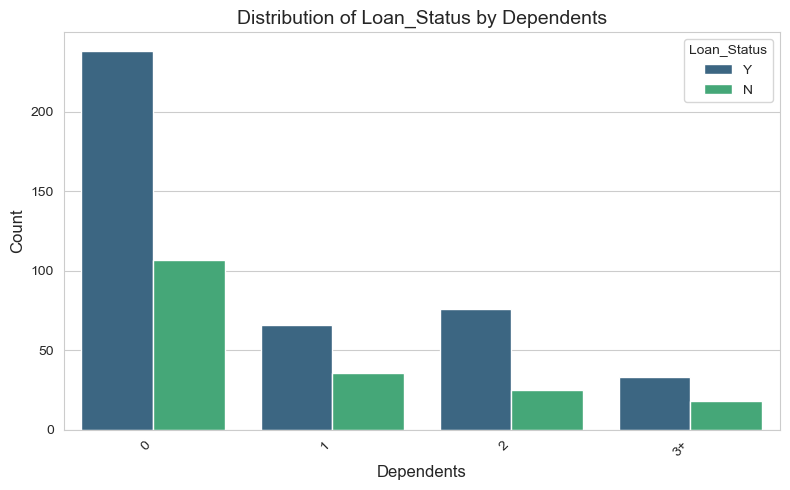

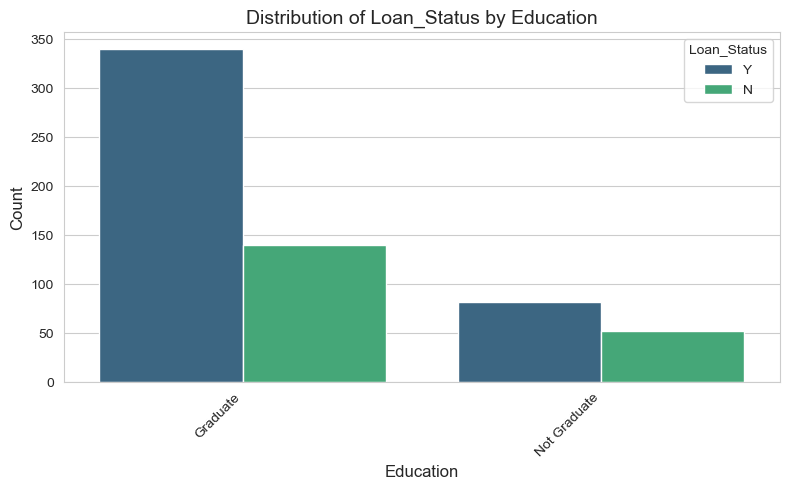

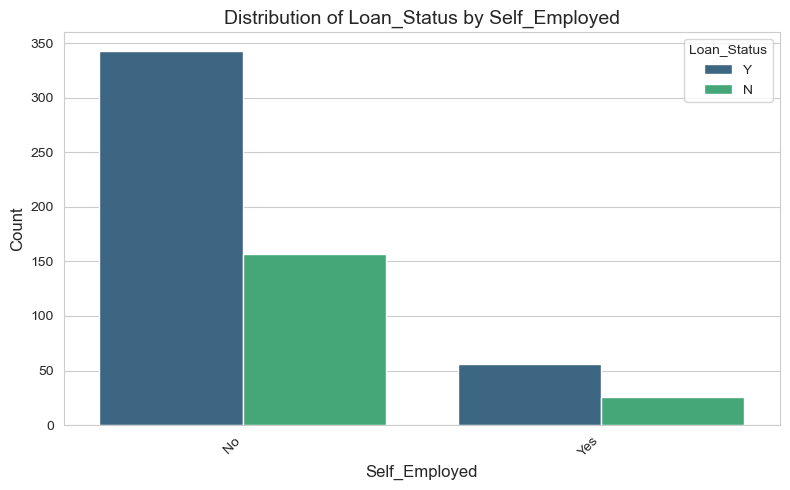

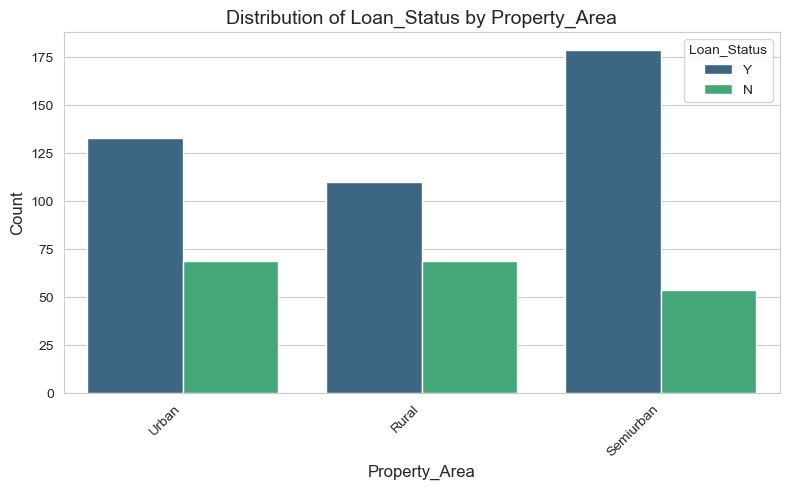

In [7]:
# identify correlaion

#Identifying Correlations: Numerical Features (Heatmaps)  
print("\n**Correlation Matrix of continuous features:**")

numerical_continuous_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
df_numerical =df[numerical_continuous_features]
df_numerical_clean = df_numerical.dropna() #cleaning table for clean output

correlation_matrix = df_numerical_clean.corr()
# print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, #decide what data to display
    annot=True, #show correlation inside cells
    cmap='coolwarm', #colorscheme
    fmt=".2f", #format
    linewidths=.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title('Correlation Matrix of Continuous Numerical Features', fontsize=16)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels if they overlap
plt.yticks(rotation=0)             # Keep y-axis labels horizontal
plt.tight_layout()                 
plt.show()


# Categorical Features (Cross-Tabulations)
print("\n**Crosstabulation of categorical features:**")
categorical_features_for_crosstab = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
target_variable = 'Loan_Status'

for feature in categorical_features_for_crosstab:
    print(f"\n--- Analyzing: {feature} vs. {target_variable} ---")
    # 1. Raw Counts (how many of each combination)
    print(f"\nCounts for {feature} vs. {target_variable}:")
    crosstab_counts = pd.crosstab(index=df[feature], columns=df[target_variable])
    print(crosstab_counts)

    # 2. Normalized by Index (Proportion of Loan Status within each category of the feature)
    # "Out of all Males, what percentage got 'Y' vs 'N'?"
    print(f"\nProportions (normalized by {feature} category) for {feature} vs. {target_variable}:")
    crosstab_normalized_by_index = pd.crosstab(index=df[feature], columns=df[target_variable], normalize='index')
    print(crosstab_normalized_by_index)

    # 3. Normalized by Columns (Proportion of feature categories within each Loan Status)
    # This shows, for example, "Out of all 'Y' loans, what percentage were Male vs. Female?"
    print(f"\nProportions (normalized by {target_variable} category) for {feature} vs. {target_variable}:")
    crosstab_normalized_by_columns = pd.crosstab(index=df[feature], columns=df[target_variable], normalize='columns')
    print(crosstab_normalized_by_columns)

    # 4. Normalized by All (Proportion of total dataset for each combination)
    print(f"\nProportions (normalized by total) for {feature} vs. {target_variable}:")
    crosstab_normalized_by_all = pd.crosstab(index=df[feature], columns=df[target_variable], normalize='all')
    print(crosstab_normalized_by_all)

    # --- Visualization (Stacked Bar Chart) ---

    plt.figure(figsize=(8,5))
    sns.countplot(
        x=feature,
        hue=target_variable,
        data=df,
        palette='viridis'
    )
    plt.title(f'Distribution of {target_variable} by {feature}' , fontsize=14)
    plt.xlabel(feature,fontsize=12)
    plt.ylabel('Count',fontsize=12)
    plt.legend(title=target_variable)
    plt.xticks(rotation=45,ha='right')
    plt.tight_layout()
    plt.show
 






--- Missing Values Before Handling ---
                  Missing Count  Missing Percentage
Credit_History               50            8.143322
Self_Employed                32            5.211726
LoanAmount                   22            3.583062
Dependents                   15            2.442997
Loan_Amount_Term             14            2.280130
Gender                       13            2.117264
Married                       3            0.488599

**Missing Values Heatmap using missingno.matrix()**


<Figure size 1500x800 with 0 Axes>

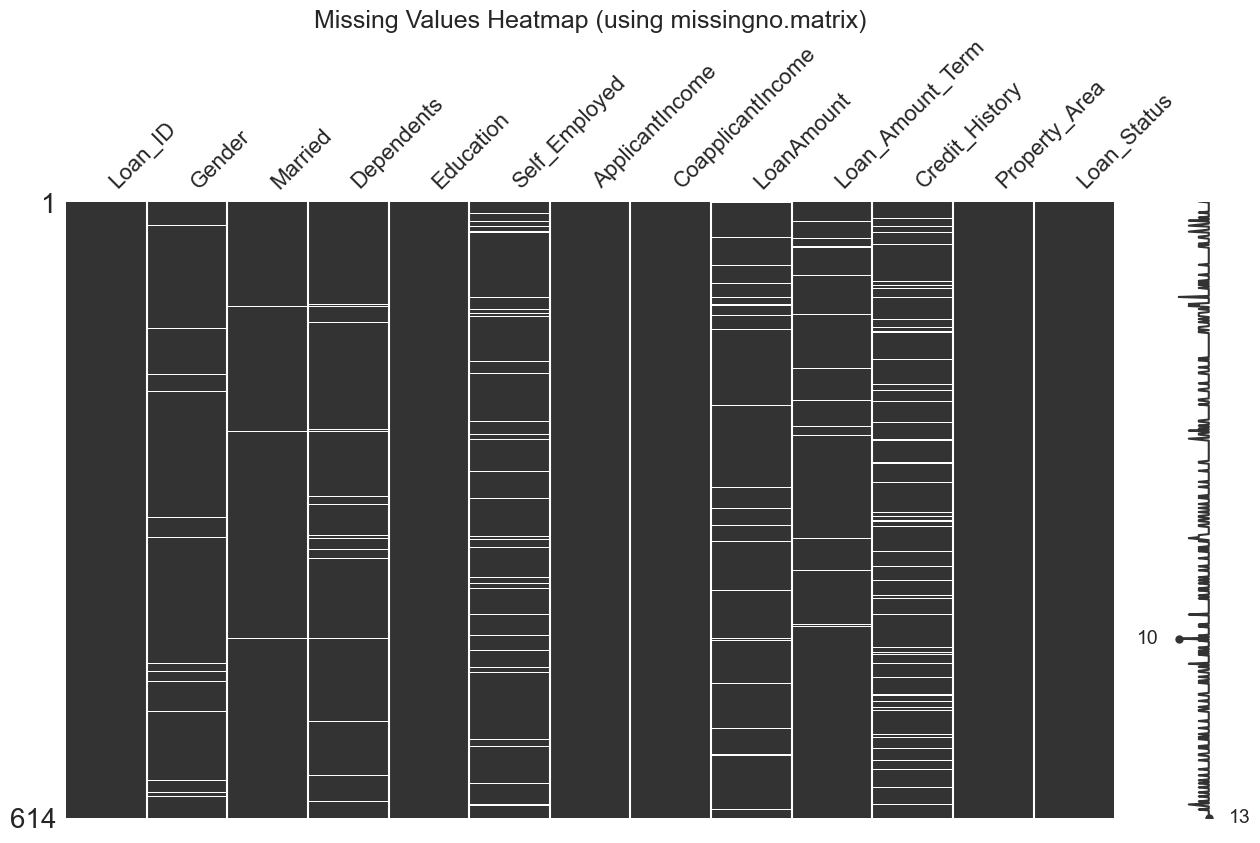


**Missing Values Bar Plot using missingno.bar()**


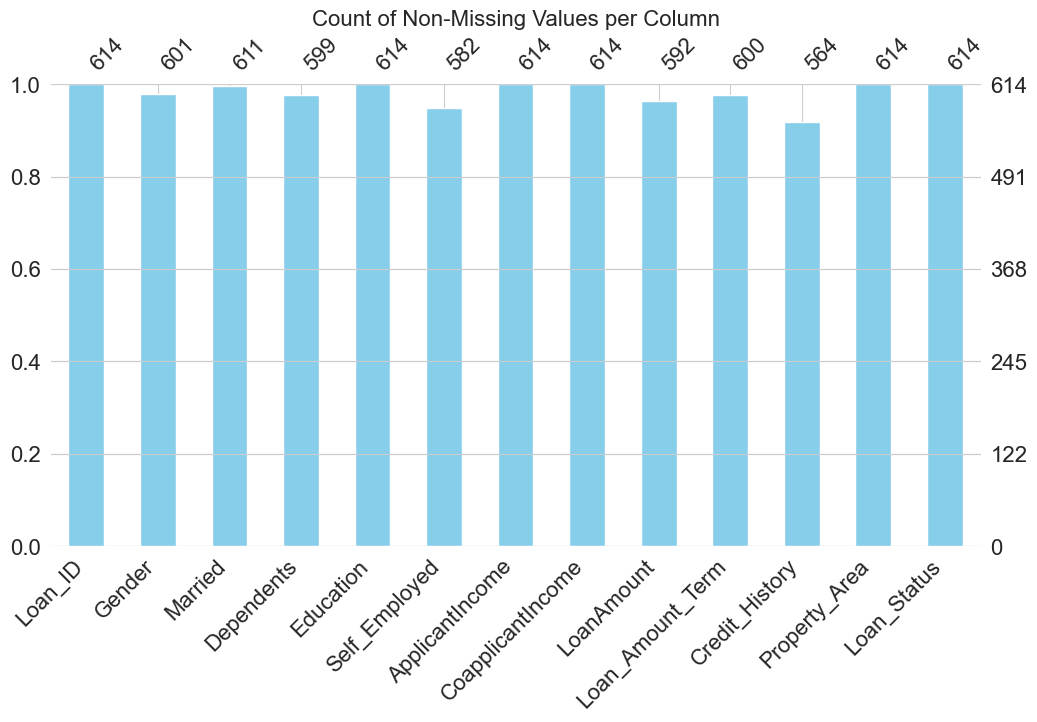


**Missingness Correlation Heatmap using missingno.heatmap()**


<Figure size 1000x800 with 0 Axes>

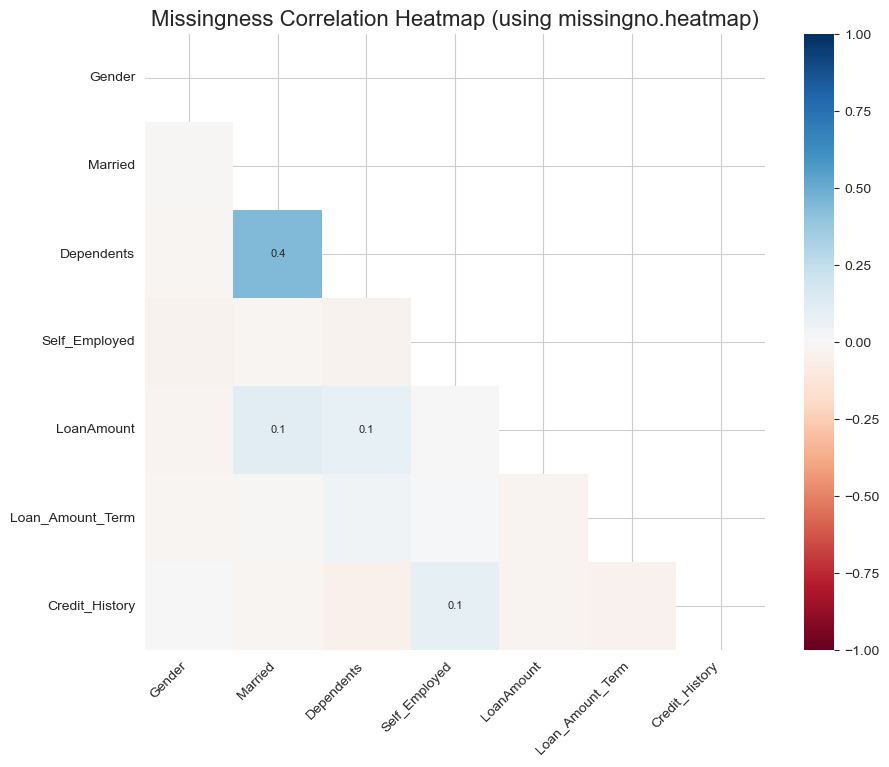

In [8]:
# Identify patterns in missing value for later handeling

print("\n--- Missing Values Before Handling ---")

missing_counts = df.isnull().sum()
missing_percentages = (missing_counts / len(df)) * 100

missing_info = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage': missing_percentages
})

missing_info = missing_info[missing_info['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False) 
#Filtering out any rows where there are no missing values, then sorts
print(missing_info)


import missingno as msno # Import the missingno library
# --- Recommended: Using missingno.matrix() for Clearer Patterns ---
print("\n**Missing Values Heatmap using missingno.matrix()**")
plt.figure(figsize=(15, 8)) # Use a larger figure size for missingno
msno.matrix(df, figsize=(15, 8), color=(0.2, 0.2, 0.2)) # Dark color for non-missing, default white for missing
# You can also customize colors, e.g., color=(0.1, 0.6, 0.5) for a teal.
# The default white for missing data stands out better against a dark background.

plt.title('Missing Values Heatmap (using missingno.matrix)', fontsize=18)
plt.show()

# You can also see a bar plot for missingness counts
print("\n**Missing Values Bar Plot using missingno.bar()**")
plt.figure(figsize=(12, 6))
msno.bar(df, figsize=(12, 6), color='skyblue')
plt.title('Count of Non-Missing Values per Column', fontsize=16)
plt.show()

# To see correlation of missingness (e.g., if A is missing, is B also missing?)
print("\n**Missingness Correlation Heatmap using missingno.heatmap()**")
plt.figure(figsize=(10, 8))
msno.heatmap(df, figsize=(10, 8), cmap='RdBu', fontsize=10) # 'RdBu' is good for correlations - red for positive, blue for negative
plt.title('Missingness Correlation Heatmap (using missingno.heatmap)', fontsize=16)
plt.show()

In [ ]:
# Decide on Imputation Strategies

# -> situation -> Independent Missingness (Mostly) | The Married-Dependents Link (0.4): This is the most notable correlation, classic imputation methods (median, mode) should not be a problem

# General principles; 
# 1) Preserve variance (be carefull with Simple imputation (mean/median/mode), they can reduce variance)
# 2) Maintain relationship (try to preserve correlations)

# Stategy: Simple imputation method for all variables

# Loan_amount: Median imputation
# Loan_amount_term: Mode imputation
# Credit_history: Mode imputation
# Gender: Mode imputation
# Maried: Mode imputation
# Dependent: Mode imputation
# Self_Employed: Mode imputation

In [ ]:
# Detect Outliers + decide on how to handle them

